# Data 1 technical tasks

In [ ]:
1. Coffee.csv datasini oxumaq

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# for OLS method
import statsmodels.api as sm
#the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import metrics

In [3]:
# Load the data from a .csv 
data = pd.read_csv(r'C:\Users\nijat\Desktop\PYTHON - KURS\Ders 13 - SLR MLR practice\coffee.csv')
data.head()

,title,coffee_type,rating,reviews,seller_name,thumbnail,price,weight,weight_formatted_to_gramms
0,"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,walmart.com,https://i5.walmartimages.com/asr/1fbbd523-8554...,13.92,40.3-ounce,1142.5
1,"café bustelo, espresso style dark roast ground...","espresso,dark roast",4.7,914,walmart.com,https://i5.walmartimages.com/asr/99a53df0-0471...,3.76,10 oz,283.5
2,"folgers classic roast ground coffee, medium ro...","medium roast,classic roast",4.4,740,walmart.com,https://i5.walmartimages.com/asr/e6aba325-608e...,9.97,25.9 ounce,734.3
3,"maxwell house original roast ground coffee, 42...",NaN,4.8,1321,walmart.com,https://i5.walmartimages.com/asr/a5be9586-b75d...,9.92,42.5 oz,1204.9
4,great value classic roast medium ground coffee...,classic roast,4.7,1598,walmart.com,https://i5.walmartimages.com/asr/de42310c-4cd6...,9.98,48 oz,1360.8


In [ ]:
2. Statistik melumatlari hem numeric hem de categoric uzre gostermek

In [5]:
data.describe()

,rating,reviews,price,weight_formatted_to_gramms
count,1400.000000,1400.000000,1400.000000,1400.000000
mean,3.982643,440.853571,14.143129,621.391786
std,1.518037,879.351997,10.129508,369.564693
min,0.000000,0.000000,1.000000,0.000000
25%,4.300000,16.000000,7.950000,340.200000
50%,4.600000,136.000000,12.735000,567.000000
75%,4.800000,604.500000,16.990000,850.500000
max,5.000000,15148.000000,77.090000,2835.000000


In [ ]:
3. Yalniz istifade edilecek column-lari saxlayiriq.

In [7]:
data = data[['rating', 'reviews', 'price', 'weight_formatted_to_gramms']]
data.head()

,rating,reviews,price,weight_formatted_to_gramms
0,3.8,93,13.92,1142.5
1,4.7,914,3.76,283.5
2,4.4,740,9.97,734.3
3,4.8,1321,9.92,1204.9
4,4.7,1598,9.98,1360.8


In [ ]:
4. NaN value varliqin yoxlamaq varsa treat edirik.

In [9]:
data.isnull().sum()

rating                        0
reviews                       0
price                         0
weight_formatted_to_gramms    0
dtype: int64

In [ ]:
5. Correlation-u hem table hem de heatmap sheklinde yoxlamaq 

In [10]:
data.corr()

,rating,reviews,price,weight_formatted_to_gramms
rating,1.000000,0.209120,-0.075347,0.121454
reviews,0.209120,1.000000,0.071503,0.169349
price,-0.075347,0.071503,1.000000,0.283919
weight_formatted_to_gramms,0.121454,0.169349,0.283919,1.000000


<AxesSubplot:>

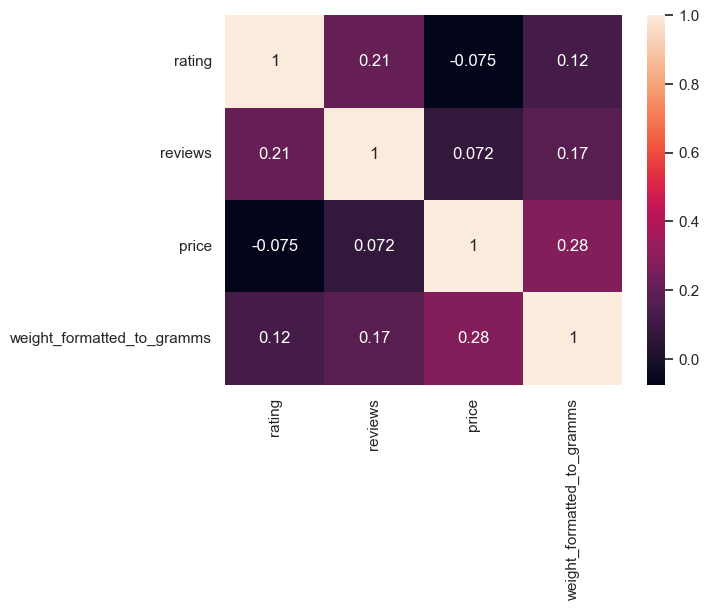

In [11]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
6. Yalniz nisbetde yuksek asilliq veren musteqil deyisheni saxlayiriq.

In [14]:
data1 = data[['weight_formatted_to_gramms', 'price']]
data1

,weight_formatted_to_gramms,price
0,1142.5,13.92
1,283.5,3.76
2,734.3,9.97
3,1204.9,9.92
4,1360.8,9.98
...,...,...
1395,272.2,13.89
1396,249.5,10.99
1397,340.2,12.98
1398,623.7,17.72


In [ ]:
7. Qalan column-lar uzre outlier treatment etmek ( capping metodu tetbiq olunacaq )

<AxesSubplot:xlabel='weight_formatted_to_gramms'>

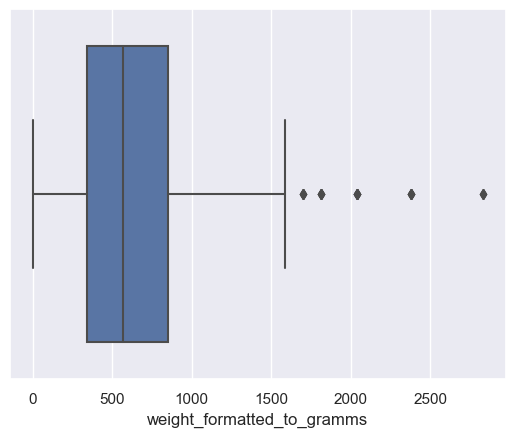

In [16]:
sns.boxplot(data=data1,x=data1['weight_formatted_to_gramms'])

<AxesSubplot:xlabel='price'>

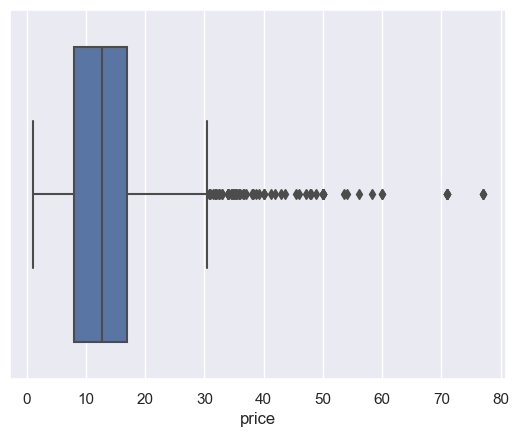

In [17]:
sns.boxplot(data=data1,x=data1['price'])

In [18]:
q1=data1.quantile(0.25)
q3=data1.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

In [19]:
Lower

weight_formatted_to_gramms   -425.25
price                          -5.61
dtype: float64

In [20]:
Upper

weight_formatted_to_gramms    1615.95
price                           30.55
dtype: float64

In [23]:
data1_capped = data1.copy()

<AxesSubplot:xlabel='weight_formatted_to_gramms'>

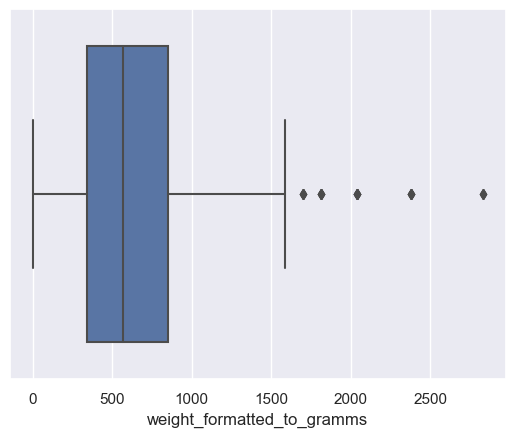

In [24]:
sns.boxplot(data=data1,x=data1['weight_formatted_to_gramms'])

In [25]:
data1_capped['weight_formatted_to_gramms'] = np.where(data1_capped['weight_formatted_to_gramms'] > Upper['weight_formatted_to_gramms'],
                                  Upper['weight_formatted_to_gramms'],data1_capped['weight_formatted_to_gramms'])

<AxesSubplot:xlabel='weight_formatted_to_gramms'>

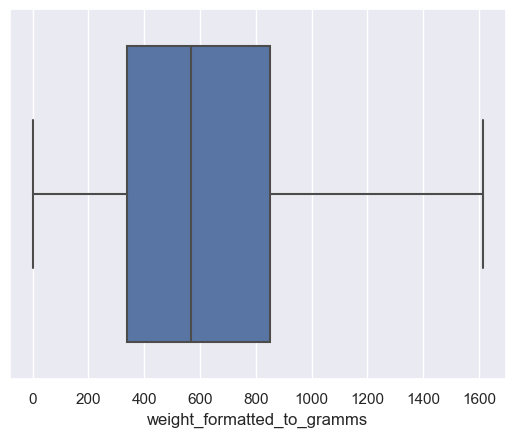

In [28]:
sns.boxplot(data=data1_capped,x=data1_capped['weight_formatted_to_gramms'])

<AxesSubplot:xlabel='price'>

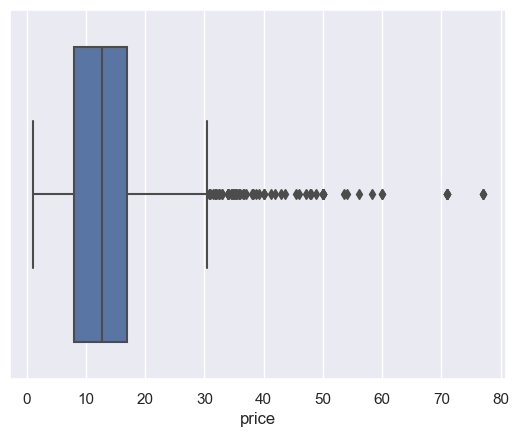

In [29]:
sns.boxplot(data=data1,x=data1['price'])

In [30]:
data1_capped['price'] = np.where(data1_capped['price'] > Upper['price'],
                                  Upper['price'],data1_capped['price'])

<AxesSubplot:xlabel='price'>

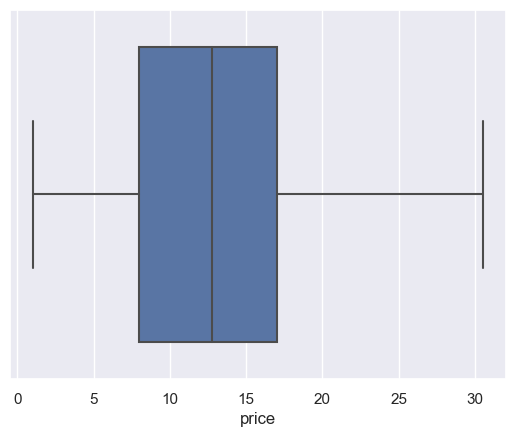

In [31]:
sns.boxplot(data=data1_capped,x=data1_capped['price'])

In [33]:
data = data1_capped
data

,weight_formatted_to_gramms,price
0,1142.5,13.92
1,283.5,3.76
2,734.3,9.97
3,1204.9,9.92
4,1360.8,9.98
...,...,...
1395,272.2,13.89
1396,249.5,10.99
1397,340.2,12.98
1398,623.7,17.72


In [ ]:
8. Musteqil ve asili deyishenlerin teyin olunmasi

In [35]:
# x musteqil
x = data[['weight_formatted_to_gramms']]
# y asili
y = data['price']

In [ ]:
9. Data train test split edilir

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

10. Xetti reqressiya tetbiq edilir

In [47]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [48]:
reg.coef_

array([0.00797839])

In [49]:
reg.intercept_

8.411868133849675

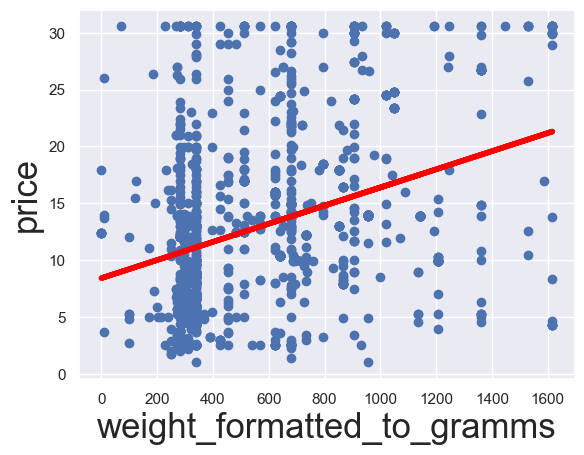

In [50]:
plt.scatter(x,y)
yhat = reg.coef_*x + reg.intercept_
fig = plt.plot(x,yhat, lw=4, c='red')
plt.xlabel('weight_formatted_to_gramms', fontsize = 25)
plt.ylabel('price', fontsize = 25)
plt.show()

In [52]:
y_pred = reg.predict(X_test)

In [53]:
y_pred

array([13.52362573, 11.12611807, 13.84036801, 11.12611807, 13.38799302,
       11.12611807, 13.38799302, 15.19749298, 10.78703629, 13.38799302,
       16.0344266 , 10.67374308, 10.85485265, 16.78040652, 11.12611807,
       16.55461795, 16.0344266 , 10.67374308, 18.02503612, 10.89953166,
       11.12611807, 11.12611807, 19.26886789, 12.48324304, 13.88584486,
       10.67374308, 11.12611807, 13.52362573, 17.52718428, 16.78040652,
       16.78040652, 13.38799302, 11.12611807, 12.48324304, 10.67374308,
       16.0344266 , 11.12611807, 15.33312569, 10.58358722, 15.64986797,
       10.89953166, 13.84036801, 16.0344266 , 11.12611807, 11.01282486,
       11.12611807, 11.12611807, 10.89953166, 19.26886789, 10.89953166,
       12.03086805, 11.12611807, 10.89953166, 18.02503612, 11.12611807,
       11.12611807, 14.74511799, 10.78703629, 13.38799302, 11.12611807,
       19.26886789, 19.26886789, 15.64986797, 11.12611807, 12.93561803,
       11.12611807, 10.67374308, 16.0344266 , 12.48324304, 21.30

In [54]:
X_test['actual'] = y_test
X_test['predicted'] = y_pred

X_test

,weight_formatted_to_gramms,actual,predicted
665,640.7,10.32,13.523626
624,340.2,9.98,11.126118
115,680.4,7.48,13.840368
478,340.2,16.98,11.126118
233,623.7,15.72,13.387993
...,...,...,...
188,680.4,14.92,13.840368
1091,907.2,14.54,15.649868
377,680.4,14.92,13.840368
351,850.5,17.92,15.197493


In [ ]:
11. RMSE, MSE, MAE errorlar ve Accuracy mueyyen edilir.

In [55]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 6.188788134703937
MSE is 61.14860173295864
RMSE is 7.81975714027991
R2 score is 0.05550950895547546


In [56]:
y_pred_train = reg.predict(X_train)

In [57]:

mae_tr = metrics.mean_absolute_error(y_train, y_pred_train)
mse_tr = metrics.mean_squared_error(y_train, y_pred_train)
rmse_tr = np.sqrt(mse)
r2_tr = metrics.r2_score(y_train, y_pred_train)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae_tr))
print('MSE is {}'.format(mse_tr))
print('RMSE is {}'.format(rmse_tr))
print('R2 score is {}'.format(r2_tr))

The model performance for testing set
--------------------------------------
MAE is 5.5390007086050215
MSE is 49.51125127754501
RMSE is 7.81975714027991
R2 score is 0.12744575338288044


# Data 2 technical tasks

In [ ]:
1. Fish.csv datasin oxumaq

In [58]:
# Load the data from a .csv 
data = pd.read_csv(r'C:\Users\nijat\Desktop\PYTHON - KURS\Ders 13 - SLR MLR practice\Fish.csv')
data.head()

,Weight,Length_Vertical,Length_Diagonal,Length_Cross,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
2. Statistik melumatlari gostermek

In [59]:
data.describe(include = 'all')

,Weight,Length_Vertical,Length_Diagonal,Length_Cross,Height,Width
count,159.000000,159.000000,138.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,27.460870,31.227044,8.970994,4.417486
std,357.978317,9.996441,11.168676,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,20.550000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,25.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.000000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
3. NaN value varliqin yoxlamaq, varsa NaN-lari doldururuq.

In [60]:
data.isnull().sum()

Weight              0
Length_Vertical     0
Length_Diagonal    21
Length_Cross        0
Height              0
Width               0
dtype: int64

In [61]:
data['Length_Diagonal'].fillna(value=data['Length_Diagonal'].mean(), inplace=True)

In [62]:
data.isnull().sum()

Weight             0
Length_Vertical    0
Length_Diagonal    0
Length_Cross       0
Height             0
Width              0
dtype: int64

In [ ]:
4. Correlation asilliqin yoxlamaq. 70 %-dan yuxari asilliqi olanlari saxlayiriq.

In [63]:
data.corr()

,Weight,Length_Vertical,Length_Diagonal,Length_Cross,Height,Width
Weight,1.000000,0.915712,0.857257,0.923044,0.724345,0.886507
Length_Vertical,0.915712,1.000000,0.973639,0.992031,0.625378,0.867050
Length_Diagonal,0.857257,0.973639,1.000000,0.947855,0.499377,0.821678
Length_Cross,0.923044,0.992031,0.947855,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.499377,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.821678,0.878520,0.792881,1.000000


In [ ]:
5. Outlier-lerin mueyyen olunmasi, varsa Capping metodu ile duzeldirik.

<AxesSubplot:xlabel='Weight'>

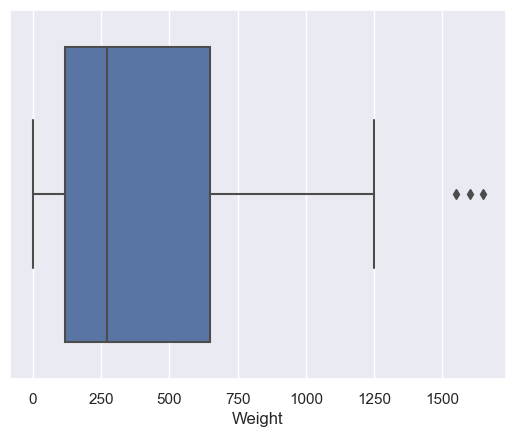

In [80]:
sns.boxplot(x=data['Weight'],data=data)

<AxesSubplot:xlabel='Length_Vertical'>

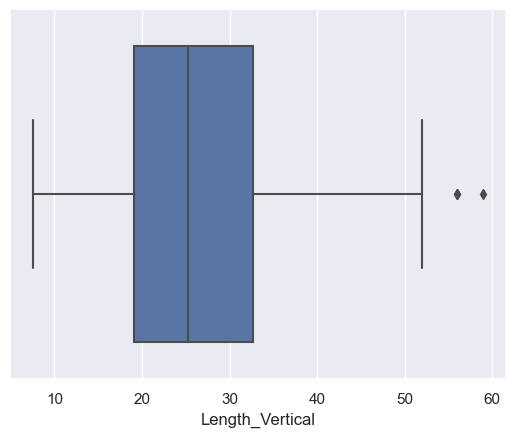

In [65]:
sns.boxplot(x=data['Length_Vertical'],data=data)

<AxesSubplot:xlabel='Length_Diagonal'>

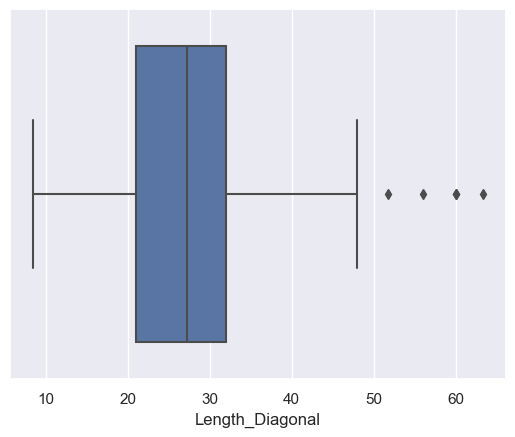

In [66]:
sns.boxplot(x=data['Length_Diagonal'],data=data)

<AxesSubplot:xlabel='Length_Cross'>

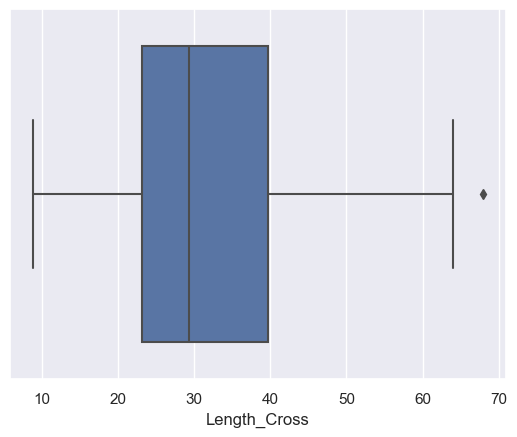

In [67]:
sns.boxplot(x=data['Length_Cross'],data=data)

<AxesSubplot:xlabel='Height'>

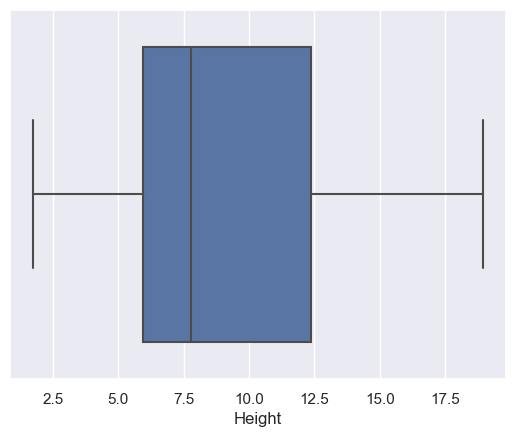

In [68]:
sns.boxplot(x=data['Height'],data=data)

<AxesSubplot:xlabel='Weight'>

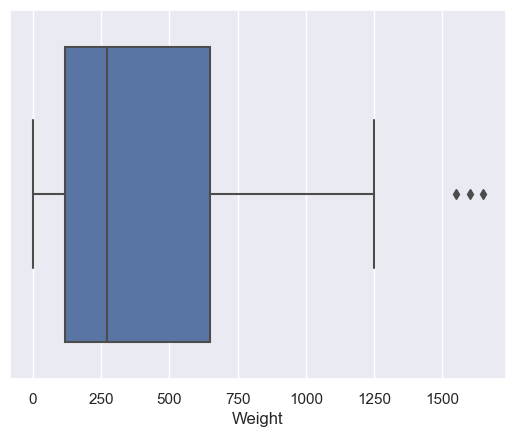

In [69]:
sns.boxplot(x=data['Weight'],data=data)

In [71]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

In [72]:
Lower

Weight            -675.000000
Length_Vertical     -1.425000
Length_Diagonal      4.500000
Length_Cross        -1.600000
Height              -3.686850
Width                0.087375
dtype: float64

In [73]:
Upper

Weight             1445.000000
Length_Vertical      53.175000
Length_Diagonal      48.500000
Length_Cross         64.400000
Height               21.997550
Width                 8.882775
dtype: float64

In [74]:
data_capped = data.copy()

<AxesSubplot:xlabel='Weight'>

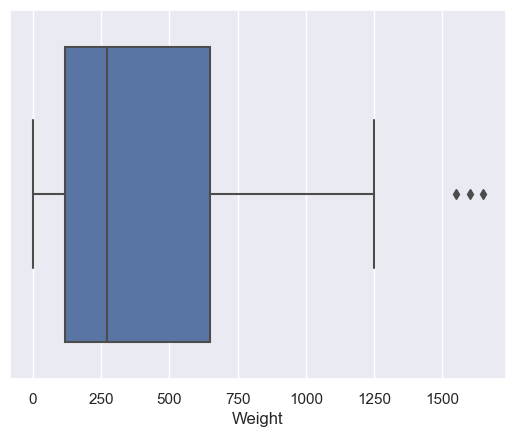

In [81]:
sns.boxplot(x=data['Weight'],data=data)

In [82]:
data_capped['Weight'] = np.where(data_capped['Weight'] > Upper['Weight'],
                                  Upper['Weight'],data_capped['Weight'])

<AxesSubplot:xlabel='Weight'>

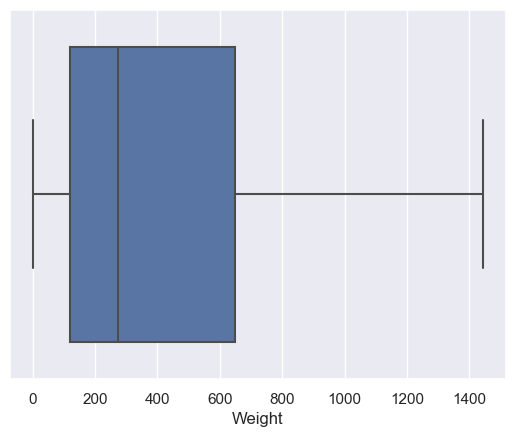

In [84]:
sns.boxplot(x=data_capped['Weight'],data=data)

<AxesSubplot:xlabel='Length_Vertical'>

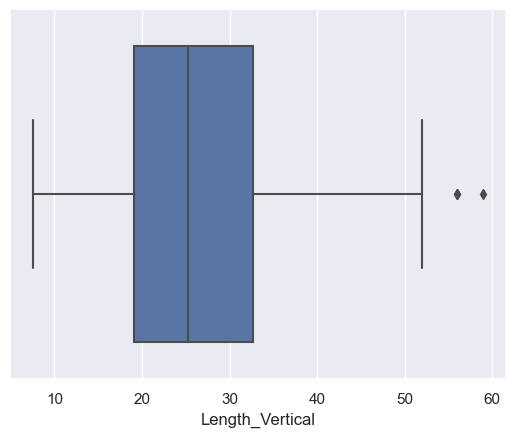

In [85]:
sns.boxplot(x=data['Length_Vertical'],data=data)

In [86]:
data_capped['Length_Vertical'] = np.where(data_capped['Length_Vertical'] > Upper['Length_Vertical'],
                                  Upper['Length_Vertical'],data_capped['Length_Vertical'])

<AxesSubplot:xlabel='Length_Vertical'>

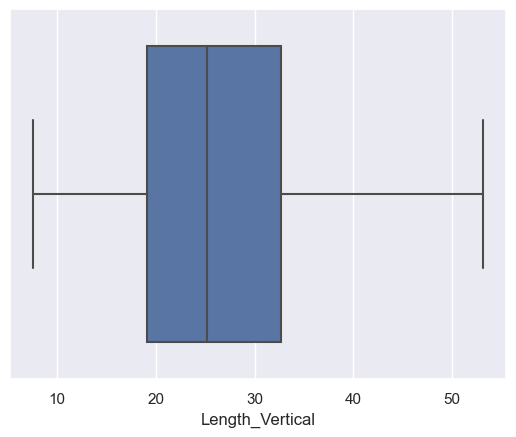

In [87]:
sns.boxplot(x=data_capped['Length_Vertical'],data=data)

<AxesSubplot:xlabel='Length_Diagonal'>

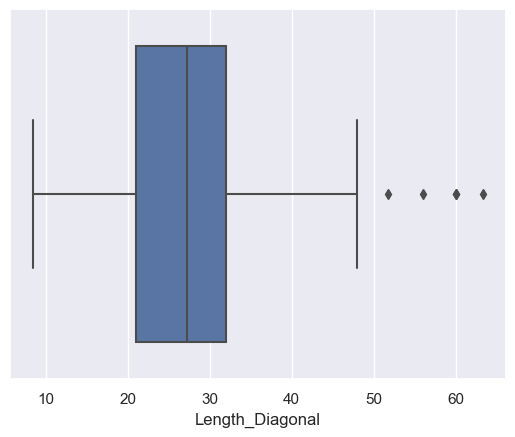

In [88]:
sns.boxplot(x=data['Length_Diagonal'],data=data)

In [89]:
data_capped['Length_Diagonal'] = np.where(data_capped['Length_Diagonal'] > Upper['Length_Diagonal'],
                                  Upper['Length_Diagonal'],data_capped['Length_Diagonal'])

<AxesSubplot:xlabel='Length_Diagonal'>

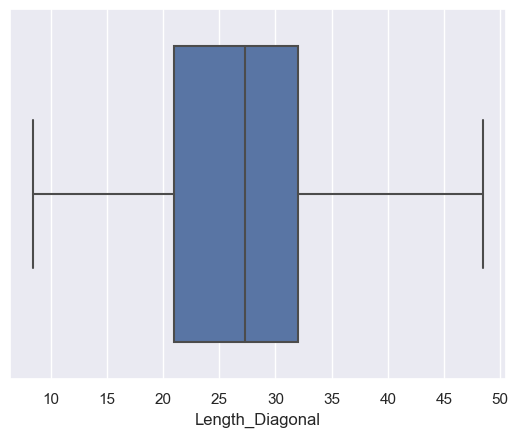

In [90]:
sns.boxplot(x=data_capped['Length_Diagonal'],data=data)

<AxesSubplot:xlabel='Length_Cross'>

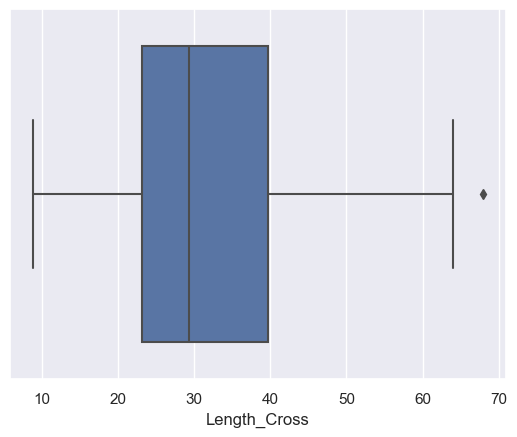

In [91]:
sns.boxplot(x=data['Length_Cross'],data=data)

In [92]:
data_capped['Length_Cross'] = np.where(data_capped['Length_Cross'] > Upper['Length_Cross'],
                                  Upper['Length_Cross'],data_capped['Length_Cross'])

<AxesSubplot:xlabel='Length_Cross'>

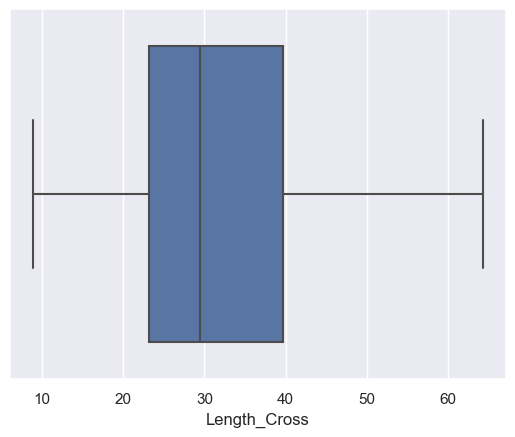

In [93]:
sns.boxplot(x=data_capped['Length_Cross'],data=data)

<AxesSubplot:xlabel='Weight'>

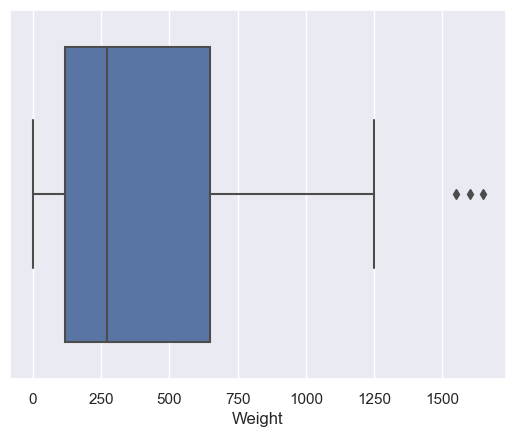

In [94]:
sns.boxplot(x=data['Weight'],data=data)

In [95]:
data_capped['Weight'] = np.where(data_capped['Weight'] > Upper['Weight'],
                                  Upper['Weight'],data_capped['Weight'])

<AxesSubplot:xlabel='Weight'>

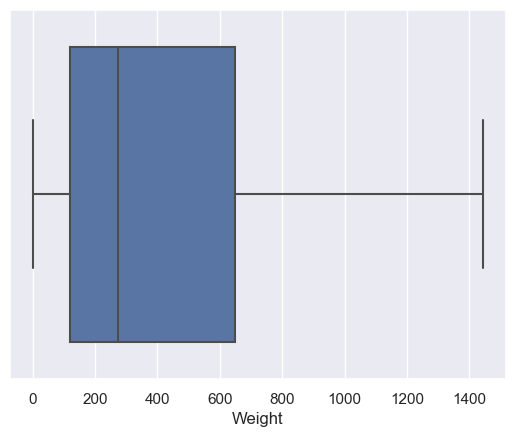

In [96]:
sns.boxplot(x=data_capped['Weight'],data=data)

In [98]:
data = data_capped
data

,Weight,Length_Vertical,Length_Diagonal,Length_Cross,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
6. Musteqil ve asili deyishenlerin teyin olunmasi

In [100]:
x = data[['Length_Vertical','Length_Diagonal', 'Length_Cross', 'Height', 'Width']]
y = data['Weight']

In [ ]:
7. Data train test split edilir

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [ ]:
8. Xetti reqressiya tetbiq edilir

In [102]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [103]:
reg.coef_

array([ 45.94303298, -26.80754342,  -1.11725236,   0.76839692,
        88.69631112])

In [104]:
reg.intercept_

-448.441072871554

In [107]:
y_pred = reg.predict(X_test)

In [108]:
y_pred

array([  81.45523087, -143.98120895,  328.76758378,  289.93915846,
        198.03914167,  907.1253709 , -178.34958648,  280.98618327,
        275.79890919, 1201.47700382,  715.53544484,  732.56804842,
        631.35178341,  134.62582608,  743.93733838,  947.34084431,
        912.79734551,  331.51716732,  226.25496046,  649.49207947,
       -144.68034032,  659.27572294,  509.67276157,  448.31140962,
        946.22040379,  857.74595807,  216.64100642,  298.73580523,
       -201.69677307, -155.1376354 ,  599.86582884,   50.16972497])

In [ ]:
10. Accuracy ve errorlar mueyyen edilir

In [109]:

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 82.85710139218338
MSE is 11877.630939962124
RMSE is 108.98454450041127
R2 score is 0.9164954267968026


In [110]:
y_pred_train = reg.predict(X_train)

In [111]:

mae_tr = metrics.mean_absolute_error(y_train, y_pred_train)
mse_tr = metrics.mean_squared_error(y_train, y_pred_train)
rmse_tr = np.sqrt(mse)
r2_tr = metrics.r2_score(y_train, y_pred_train)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae_tr))
print('MSE is {}'.format(mse_tr))
print('RMSE is {}'.format(rmse_tr))
print('R2 score is {}'.format(r2_tr))

The model performance for testing set
--------------------------------------
MAE is 80.07230894201746
MSE is 10618.107653435589
RMSE is 108.98454450041127
R2 score is 0.9073130826001097
